In [146]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
%matplotlib inline
sns.set_palette("Set2")

In [3]:
#load data
raw_ds=pd.read_csv(r"..\data\raw\investigator_nacc50.csv")


C:\Users\viceva\miniconda3\envs\AD\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,421,423,432,445,454,494,568,576,601,637,653,670,673,678,690,701,707,709,772,773,781,792,794,796,798,804,865,920,921,922,930,931,932,933,943,965,968,971) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
raw_ds.head()

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPCPRION,NPPOTH1,NPCOTH1,NPOTH1X,NPPOTH2,NPCOTH2,NPOTH2X,NPPOTH3,NPCOTH3,NPOTH3X
0,NACC000385,289,I,1.0,11,8,2006,1,7,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NACC000385,289,F,2.0,3,19,2008,2,7,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NACC000385,289,F,2.0,3,4,2009,3,7,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NACC000385,289,F,2.0,4,21,2010,4,7,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NACC000385,289,F,2.0,1,28,2011,5,7,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
list(raw_ds)

['NACCID',
 'NACCADC',
 'PACKET',
 'FORMVER',
 'VISITMO',
 'VISITDAY',
 'VISITYR',
 'NACCVNUM',
 'NACCAVST',
 'NACCNVST',
 'NACCDAYS',
 'NACCFDYS',
 'NACCCORE',
 'NACCREAS',
 'NACCREFR',
 'BIRTHMO',
 'BIRTHYR',
 'SEX',
 'HISPANIC',
 'HISPOR',
 'HISPORX',
 'RACE',
 'RACEX',
 'RACESEC',
 'RACESECX',
 'RACETER',
 'RACETERX',
 'PRIMLANG',
 'PRIMLANX',
 'EDUC',
 'MARISTAT',
 'NACCLIVS',
 'INDEPEND',
 'RESIDENC',
 'HANDED',
 'INBIRMO',
 'INBIRYR',
 'INSEX',
 'NEWINF',
 'INHISP',
 'INHISPOR',
 'INHISPOX',
 'NACCNINR',
 'INRACE',
 'INRACEX',
 'INRASEC',
 'INRASECX',
 'INRATER',
 'INRATERX',
 'INEDUC',
 'INRELTO',
 'INRELTOX',
 'INKNOWN',
 'INLIVWTH',
 'INVISITS',
 'INCALLS',
 'INRELY',
 'NACCFAM',
 'NACCMOM',
 'NACCDAD',
 'NACCAM',
 'NACCAMX',
 'NACCAMS',
 'NACCAMSX',
 'NACCFM',
 'NACCFMX',
 'NACCFMS',
 'NACCFMSX',
 'NACCOM',
 'NACCOMX',
 'NACCOMS',
 'NACCOMSX',
 'NACCFADM',
 'NACCFFTD',
 'ANYMEDS',
 'DRUG1',
 'DRUG2',
 'DRUG3',
 'DRUG4',
 'DRUG5',
 'DRUG6',
 'DRUG7',
 'DRUG8',
 'DRUG9',
 'DRU

In [15]:
raw_ds.shape

(152725, 972)

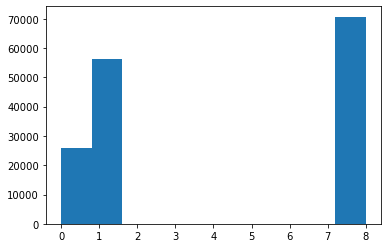

In [13]:
plt.hist(raw_ds['NACCALZD']);

In [4]:
print(sum(raw_ds['NACCALZD']==1)) #Presumptive etiologic diagnosis (could be contributing)
print(sum(raw_ds['NACCETPR']==1)) #Primary etiologic diagnosis

56280
53200


In [4]:
#NACCUDSD: 3 = MCI; 4 = Dementia; NACCETPR=1 AD; is this last one = to NACCALZD=1? no. see above
MCI_index=np.unique(raw_ds.loc[(raw_ds['NACCUDSD']==3) & ((raw_ds['NACCETPR']==1) | (raw_ds['NACCETPR']==99)),['NACCID']])
Dem_index=np.unique(raw_ds.loc[(raw_ds['NACCUDSD']==4) & (raw_ds['NACCETPR']==1),['NACCID']])
combi_i=set(MCI_index).intersection(Dem_index)
len(combi_i)


2831

In [5]:
AD_MCI=raw_ds.loc[raw_ds['NACCID'].isin(combi_i)]
#db of etiol AD patients that had at one point MCI and developed dementia


In [6]:
#add sb of etiol AD patients that had at one point MCI and did not develop dementia
nod_index=set(MCI_index).difference(combi_i)
AD_MCI=pd.concat([AD_MCI,raw_ds.loc[raw_ds['NACCID'].isin(nod_index)]])
len(nod_index)

6752

In [67]:
len(combi_i)

2831

In [7]:
#add visit date and create target
AD_MCI['visitdate']=pd.to_datetime(dict(year=AD_MCI.VISITYR, month=AD_MCI.VISITMO, day=AD_MCI.VISITDAY))
scores=np.concatenate((np.ones(len(combi_i)),np.zeros(len(nod_index))))
idi=list(combi_i)+list(nod_index)
op={'NACCID':idi, 'target':scores}
output= pd.DataFrame(op)

In [137]:
#add interval between visits, with last visit being NAN
visit_interval=np.array([])
for i in np.unique(AD_MCI['NACCID']):
    temp=AD_MCI[['NACCVNUM','NACCAVST','visitdate']].loc[AD_MCI['NACCID'] == i]
    for n in temp['NACCVNUM']:
        if n not in temp['NACCAVST'].values:
            visit_next=(temp['visitdate'].loc[temp['NACCVNUM'] == n+1]).values
            visit_now=(temp['visitdate'].loc[temp['NACCVNUM'] == n])
            visit_interval=np.append(visit_interval,(visit_next-visit_now).dt.days)
        else:
            visit_interval=np.append(visit_interval,np.nan)

In [139]:
AD_MCI['visit_interval']=visit_interval

In [56]:
#faster solution with no loops? pct_change = close[1:]/close[:-1]

#make sure the df is sorted by id and then NACCVNUM
#create col with visitdate shifted 1 up
# substract to visitdate
#find loc where NACCVNUM NACCAVST and substitute by nan.



In [143]:
#lets map the output to the main
AD_MCI=AD_MCI.join(output.set_index('NACCID'), on= 'NACCID')

In [144]:
AD_MCI

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPOTH1X,NPPOTH2,NPCOTH2,NPOTH2X,NPPOTH3,NPCOTH3,NPOTH3X,visitdate,visit_interval,target
26,NACC004445,289,I,1.0,2,13,2008,1,4,2,...,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN,2008-02-13,427.0,1.0
27,NACC004445,289,F,2.0,4,10,2009,2,4,2,...,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN,2009-04-10,351.0,1.0
28,NACC004445,289,T,2.0,6,4,2010,3,4,2,...,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN,2010-06-04,426.0,1.0
29,NACC004445,289,T,2.0,3,22,2011,4,4,2,...,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN,2011-03-22,NaN,1.0
124,NACC031269,289,I,3.0,6,6,2016,1,2,2,...,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN,2016-06-06,474.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152710,NACC993286,9661,I,1.0,8,4,2006,1,5,5,...,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN,2006-08-04,NaN,0.0
152711,NACC993286,9661,F,1.0,9,28,2007,2,5,5,...,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN,2007-09-28,416.0,0.0
152712,NACC993286,9661,F,2.0,6,18,2009,3,5,5,...,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN,2009-06-18,460.0,0.0
152713,NACC993286,9661,F,2.0,10,8,2010,4,5,5,...,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN,2010-10-08,350.0,0.0


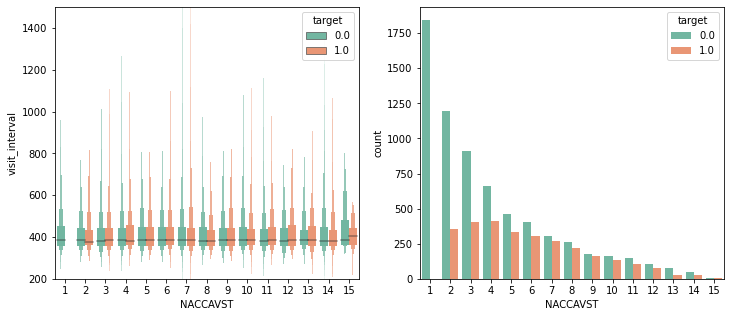

In [224]:
#plot the number of visits and interval beetween for the two catergories; 
f, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxenplot(x="NACCAVST", y="visit_interval", hue="target",showfliers=0,
            data=AD_MCI,ax=axes[0]); axes[0].set(ylim=(200, 1500))

sns.countplot(x="NACCAVST", hue="target",
            data=AD_MCI.groupby(['NACCID']).mean(),ax=axes[1]);
#g.set_xticklabels(g.get_xticklabels(),rotation=45)
labels = [label.get_text() for label in axes[1].get_xticklabels()];
axes[1].set_xticklabels(map(lambda x: "{:g}".format(float(x)), labels));



In [227]:
# drop everything that is not MCI & dem (we won't take into account healthy history. 
#Reconsider this step if building historic model)
clean_AD_MCI=AD_MCI.loc[(AD_MCI['NACCUDSD']>=3)]
print(clean_AD_MCI.shape)
#drop NACCIDs with just one visit
clean_AD_MCI=clean_AD_MCI[clean_AD_MCI['NACCID'].map(clean_AD_MCI['NACCID'].value_counts()) >= 2]
print(clean_AD_MCI.shape)
# drop everything that is not MCI 
clean_AD_MCI=clean_AD_MCI.loc[(clean_AD_MCI['NACCUDSD']==3)]
print(clean_AD_MCI.shape)

#check again to see if we need to drop desangelados
#todrop=[]
c=0
for i in nod_index:
    if clean_AD_MCI.loc[clean_AD_MCI.NACCID == i, 'NACCID'].count()<2 & clean_AD_MCI.loc[clean_AD_MCI.NACCID == i, 'NACCID'].count()> 0:
        c+=1
        #todrop.append(clean_AD_MCI.index[clean_AD_MCI['NACCID'] == i].tolist())
        #clean_AD_MCI=clean_AD_MCI.drop(clean_AD_MCI.index[clean_AD_MCI['NACCID'] == i])

print(c)


(29927, 975)
(26931, 975)
(18774, 975)
0


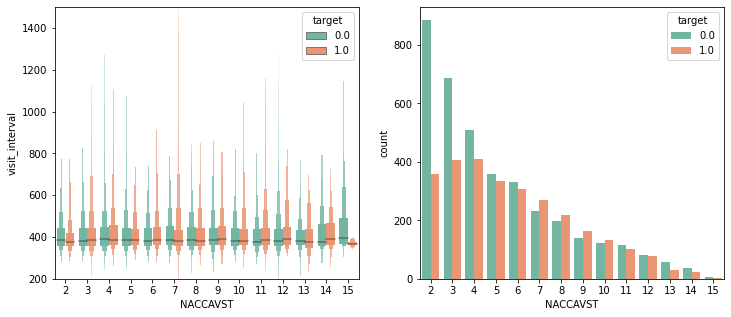

In [225]:
#recheck distros
f, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxenplot(x="NACCAVST", y="visit_interval", hue="target",showfliers=0,
            data=clean_AD_MCI,ax=axes[0]); axes[0].set(ylim=(200, 1500))

sns.countplot(x="NACCAVST", hue="target",
            data=clean_AD_MCI.groupby(['NACCID']).mean(),ax=axes[1]);
#g.set_xticklabels(g.get_xticklabels(),rotation=45)
labels = [label.get_text() for label in axes[1].get_xticklabels()];
axes[1].set_xticklabels(map(lambda x: "{:g}".format(float(x)), labels));

In [230]:
#drop columns full of nans
clean_AD_MCI=clean_AD_MCI.dropna(axis=1,how='all')

In [232]:
#save this dataframe
#clean_AD_MCI.to_csv('..\data\interim\AD_MCI.csv')